# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

#Setup plotting parameters
plt.style.use('seaborn')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

#Configure Matplotlib for better display
plt.rcParams['figure.figsize']=(12,8)
plt.rcParams['font.size'] = 10

# Load Dataset from Kaggle

In [2]:
df = pd.read_csv('air_quality_data.csv')
df

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Johannesburg,South Africa,2023-09-16,147.85,184.34,90.33,34.93,2.81,191.45,-1.92,65.22,15.48
9996,Berlin,Germany,2023-12-05,12.22,121.49,49.04,5.66,2.10,184.56,-9.81,12.16,10.75
9997,Moscow,Russia,2023-11-26,44.07,143.62,8.41,32.58,0.69,167.68,39.35,53.95,4.56
9998,Berlin,Germany,2023-02-03,67.43,96.79,43.23,29.19,6.01,148.50,26.21,58.54,2.71


In [3]:
df.shape

(10000, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         10000 non-null  object 
 1   Country      10000 non-null  object 
 2   Date         10000 non-null  object 
 3   PM2.5        10000 non-null  float64
 4   PM10         10000 non-null  float64
 5   NO2          10000 non-null  float64
 6   SO2          10000 non-null  float64
 7   CO           10000 non-null  float64
 8   O3           10000 non-null  float64
 9   Temperature  10000 non-null  float64
 10  Humidity     10000 non-null  float64
 11  Wind Speed   10000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 937.6+ KB


# Data Preprocessing and Cleaning

In [5]:
#Convert Date coloumn to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
#Check Misisng Values

df.isnull().sum()

City           0
Country        0
Date           0
PM2.5          0
PM10           0
NO2            0
SO2            0
CO             0
O3             0
Temperature    0
Humidity       0
Wind Speed     0
dtype: int64

In [7]:
# Create additional time-based features to help us in visualisations

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()

In [8]:
df.describe()

,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed,Year,Month
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.0,10000.000000
mean,77.448439,104.438161,52.198649,25.344490,5.047984,106.031643,14.89715,55.078579,10.231636,2023.0,6.471900
std,41.927871,55.062396,27.320490,14.091194,2.852625,55.081345,14.44380,25.982232,5.632628,0.0,3.435577
min,5.020000,10.000000,5.010000,1.000000,0.100000,10.040000,-10.00000,10.010000,0.500000,2023.0,1.000000
25%,41.185000,57.137500,28.347500,13.190000,2.560000,58.380000,2.25750,32.527500,5.290000,2023.0,3.000000
50%,77.725000,103.690000,52.100000,25.350000,5.090000,106.055000,14.75500,55.080000,10.260000,2023.0,6.000000
75%,113.392500,152.265000,75.705000,37.500000,7.480000,153.982500,27.38250,77.442500,15.070000,2023.0,9.000000
max,149.980000,200.000000,100.000000,49.990000,10.000000,200.000000,40.00000,99.990000,20.000000,2023.0,12.000000


In [9]:
df['City'].nunique()

20

In [10]:
df['Country'].nunique()

19

# Visualization

## Visualization 1 -PM2.5 Trends Over Time

In [11]:
# PM2.5 Trends using Monthly Averages
plt.figure(figsize=(14, 8))

#Select Top 5 Cities to avoid clutter
top_cities = df['City'].value_counts().head(5).index
top_cities

Index(['Mumbai', 'Seoul', 'Johannesburg', 'Dubai', 'Berlin'], dtype='object')

<Figure size 1008x576 with 0 Axes>

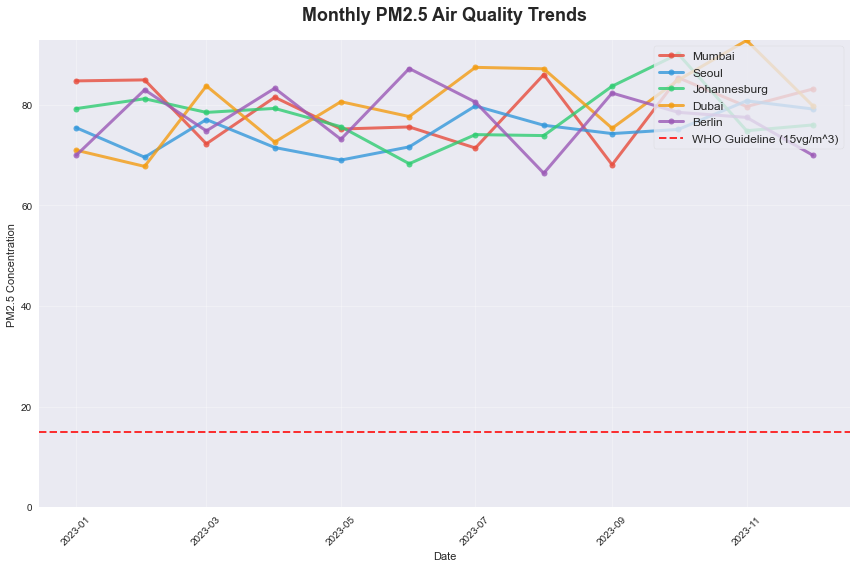

In [12]:
#Create Monthly averages to smooth the data
df_monthly = df[df['City'].isin(top_cities)].groupby(['City', df['Date'].dt.to_period('M')])['PM2.5'].mean().reset_index()
df_monthly['Date'] =df_monthly['Date'].dt.to_timestamp()

#Define colors for each city
colors = ['#e74c3c','#3498db','#2ecc71','#f39c12','#9b59b6']

#Plot each city
for i, city in enumerate(top_cities):
    city_data = df_monthly[df_monthly['City']== city].sort_values('Date')
    plt.plot(city_data['Date'],city_data['PM2.5'], marker='o', markersize=6, linewidth=3,color=colors[i],label=city,alpha=0.8)
    
#Add WHO guideline
plt.axhline(y=15, color='red', linestyle='--', linewidth=2, alpha=0.8, label ='WHO Guideline (15vg/m^3)')

plt.title('Monthly PM2.5 Air Quality Trends', fontsize=18,fontweight='bold',pad=20)
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.legend(loc='upper right', frameon=True,fontsize=12)
plt.grid(True,alpha=0.3)
plt.xticks(rotation=45)
plt.ylim(0, max(df_monthly['PM2.5'].max(),50))
plt.tight_layout()
plt.show()

## Visualization 2 - City Air Quality Ranking 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


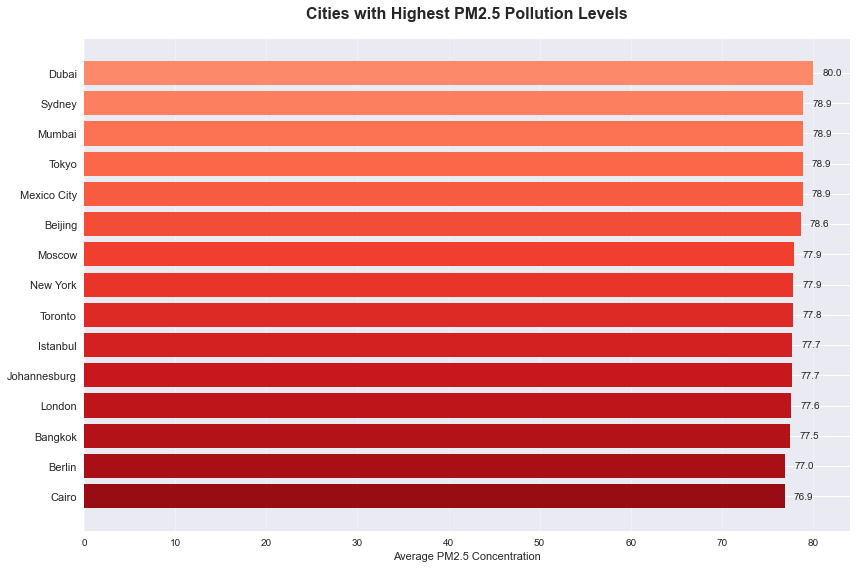

In [16]:
plt.figure(figsize=(12,8))

#Calculate average PM2.5 by city and get top 15 worst cities
city_avg_pm25 =df.groupby('City')['PM2.5'].mean().sort_values(ascending=False).head(15)

#Create Horizontal bar chart
colors = plt.cm.Reds(np.linspace(0.4,0.9,len(city_avg_pm25)))
bars =plt.barh(range(len(city_avg_pm25)), city_avg_pm25.values, color = colors)

plt.yticks(range(len(city_avg_pm25)),city_avg_pm25.index, fontsize=11)
plt.xlabel('Average PM2.5 Concentration')
plt.title('Cities with Highest PM2.5 Pollution Levels',fontsize=16,fontweight='bold',pad=20)

for i, (city,value) in enumerate(city_avg_pm25.items()):
    plt.text(value+1,i, f'{value:.1f}',va='center',fontsize=10)
    
plt.grid(axis='x',alpha=0.3)
plt.legend(fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Visualitation 3 - Seasonal Air Quality Patterns 

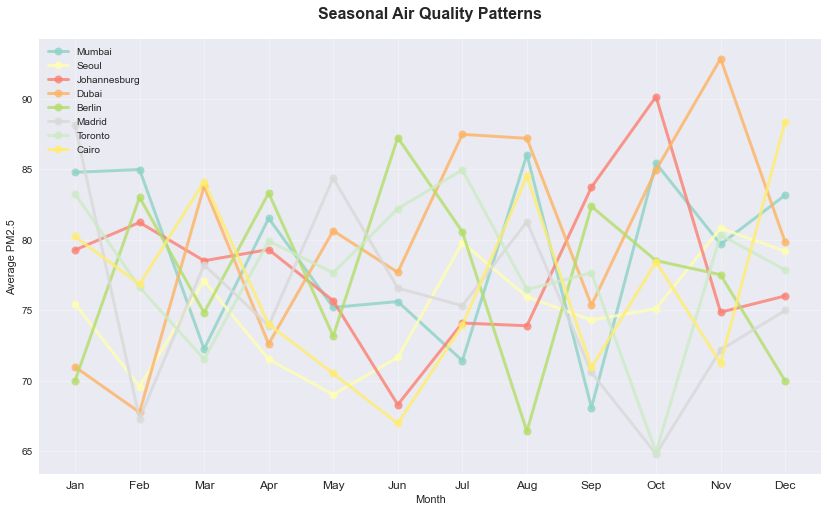

In [22]:
plt.figure(figsize=(14,8))

#Select 8 cities with most data
top_cities_seasonal =df['City'].value_counts().head(8).index

#Calculate monthly averages
monthly_data = df[df['City'].isin(top_cities_seasonal)].groupby(['City', 'Month'])['PM2.5'].mean().reset_index()

colors =plt.cm.Set3(np.linspace(0, 1, len(top_cities_seasonal)))

for i, city in enumerate(top_cities_seasonal):
    city_data=monthly_data[monthly_data['City']==city]
    plt.plot(city_data['Month'],city_data['PM2.5'],marker='o', markersize=8, linewidth=3,color=colors[i],label=city,alpha=0.8)

#Formatting 
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(range(1,13),months,fontsize=12)

plt.title('Seasonal Air Quality Patterns',fontsize=16, fontweight='bold',pad=20)
plt.xlabel('Month')
plt.ylabel('Average PM2.5')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Summary of Key Observations

In [24]:
worst_pm25_city = df.loc[df['PM2.5'].idxmax(), 'City']
worst_pm25_value = df['PM2.5'].max()
best_pm25_city = df.loc[df['PM2.5'].idxmin(), 'City']
best_pm25_value = df['PM2.5'].min()

print("Worst PM2.5 Pollution", worst_pm25_city)
print("Worst PM2.5 Pollution Value", worst_pm25_value)

print("Best PM2.5 Pollution", best_pm25_city)
print("Besr PM2.5 Pollution Value", best_pm25_value)


Worst PM2.5 Pollution Beijing
Worst PM2.5 Pollution Value 149.98
Best PM2.5 Pollution Johannesburg
Besr PM2.5 Pollution Value 5.02


In [25]:
#Seasonal Patterns
seasonal_pm25 = df.groupby('Month')['PM2.5'].mean()
worst_month =seasonal_pm25.idxmax()
best_month =seasonal_pm25.idxmin()

print("Worst Pollution Month", worst_month)
print("Best Pollution Month", best_month)


Worst Pollution Month 1
Best Pollution Month 9


Overall conclusions:

-- All these cities exceed WHO PM2.5 limits, meaning air quality is poor.

-- Dubai and Mumbai are consistently the worst.

-- Some seasonal patterns exist, but no city stays clean year-round.

--  Air pollution is a global problem, especially in big cities in Asia, the Middle East, and some in Europe.